### 서울시 구별 cctv 분석 , 구별 인구 대비 분석
이름 > seoul_cctv_state.xlsx 로 저장<br>
위치 > '../data/seoul_cctv_state.xlsx'

### 서울시 인구 통계
이름 > report.csv <br>
위치 > '../data/report.csv'

### ???
이름 > Report.csv <br>
위치 > '../data/Report.xlsx'
위치 > '../data/Report.csv'

----
+ 개별 데이터 분석 
+ 상관성 분석
+ pandas 사용법 분석, 시각화 연습 

In [2]:
import pandas as pd 
import numpy as np

1. 먼저 모듈을 불러온다 즉, 시작은 import를 먼저 !<br>

**Pandas**
- import pandas as pd  => as는 as 뒤에 붙는 pd라는 짧은 단어로 대체 (---)
- s_cctv.head() = > pandas의 첫 5행만 보여달라 
- pandas에서 엑셀(csv) 파일로드
- 데이터를 부분 확인후 데이터이 이상여부 간단히 시각적 확인

In [3]:
s_cctv= pd.read_excel('../data/seoul_cctv_state.xlsx', encoding='utf-8')
# 상위 값 확인 
#s_cctv.head() # 상위 5개 
s_cctv.head(3) # 상위 3개 

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319


In [4]:
# 하위값 확인 
s_cctv.tail() # 5개 (기본 5개)
s_cctv.tail(2) #2개 

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9


In [5]:
#전체 확인 
#s_cctv
# 탐색
s_cctv.columns
# 열을 보여달라

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [6]:
# '소계'라는 컬럼명 확득 
s_cctv.columns[1]

'소계'

In [7]:
# 기관명 => 자치구로 명칭을 통일 
#    - DataFrame(데이터 프레임)의 컬럼명을 변경 => 의미의 정확성 부여 
# inplace_ 파라미터는 원본을 변경할것인가 => Ture면 원본 변경해서 반영까지 
# 키 key : 이전 컬럼명, 값 : 신규 컬럼명
s_cctv.rename( columns={ s_cctv.columns[0]:'자치구' }, inplace=True )
# 확인_ 컬럼명 변경이 반영되었는지 head로 확인 
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


# 연습 
- s_pop 이라는 변수 명으로 report.csv를 데이터 로드 하기 
- 데이터가 잘 오픈되지 않아서 일단 Report.**xls**로 다시 받아서 진행 

In [8]:
#인구현황 
s_pop = pd.read_excel('../data/Report.xls', encoding='utf-8')
# euc-kr => 한글을 2byte로 변환하는 방법 
s_pop.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,인구밀도,인구밀도,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
2,2011,합계,4192752,10528774,5208492,5320282,10249679,5073899,5175780,279095,134593,144502,17397,605.2,2.4,1049425
3,2011,종로구,76688,177419,88107,89312,168382,83931,84451,9037,4176,4861,7421,23.9,2.2,22939
4,2011,중구,61475,141567,71137,70430,133193,67065,66128,8374,4072,4302,14212,10,2.2,18099


In [9]:
s_pop = pd.read_excel('../data/Report.xls', 
                      header  = 2,
                      usecols ='A,B,D,G,J,P', # 엑셀 컬럼순서 
                      encoding='utf-8')
# 데이터를 보니 컬럼쪽이 2개가 더 많이 나타남 
# 헤더를 2번으로 지정하여 개수를 줄일것 
# 필요없는 데이터는 로드 단계에서 걸러 내자  => 사전데이터르 보고 판단.
s_pop.head(2)

,기간,자치구,계,계.1,계.2,65세이상고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


### 컬럼명을 의미 있게 조정 
-  계 ~ .... 고령자 수 = > 인구수, 한국인 , 외국인 , 고령자


**1번 방법**

    '''

    s_cctv.rename( columns={ s_pop.columns[0]:'자치구' 
                         s_pop.columns[1]:'인구수',
                         s_pop.columns[2]:'한국인',
                         s_pop.columns[3]:'외국인',
                         s_pop.columns[4]:'고령자'
                       }, inplace=True )
    '''

**2번 방법**

    '''
    dic = {
            s_pop.columns[0]:'자치구' 
            s_pop.columns[1]:'인구수',
            s_pop.columns[2]:'한국인',
            s_pop.columns[3]:'외국인',
            s_pop.columns[4]:'고령자'
    }
    s_pop.rename( columns=dic,inplace=True )
    s_pop.head(2)

    '''

In [10]:
dic = {
        s_pop.columns[1]:'자치구',
        s_pop.columns[2]:'인구수',
        s_pop.columns[3]:'한국인',
        s_pop.columns[4]:'외국인',
        s_pop.columns[5]:'고령자'
}
s_pop.rename( columns=dic,inplace=True )
s_pop.head(2)

,기간,자치구,인구수,한국인,외국인,고령자
0,2011,합계,10528774,10249679,279095,1049425
1,2011,종로구,177419,168382,9037,22939


## pandas 기초 

<a href='http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/basic/pandas_%EA%B8%B0%EC%B4%88.ipynb'>이동하기</a>

## 데이터 특성파악

In [11]:
s_cctv.head(3)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319


In [12]:
# 소계 칼럼을 중심으로 오른차순 정렬
s_cctv.sort_values( by='소계', ascending=False ).head(3)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486


In [13]:
s_cctv.sort_values( by='소계', ascending=True ).head(3)
#cctv 전체 개수인 소계로 정렬 

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319


In [14]:
# 소계 칼럼을 중심으로 내림차순 정렬
s_cctv.sort_values( by='소계', ascending=True ).tail(3)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448


- 강남구, 구로구 지역은 상업지구가 많아서, 관악구나 성북구는 산을 타고 빌라촌이 많다
- 이런 지역에는 인구 밀도가 비교적 높아서(예상) 혹은 유동인구가 많아서 CCTV가 많지 않나 예상이 된다
- 도봉구, 중랑구, 강북구등은 주거지가 많아서 적어 보이고, 종로구는 보류
- 2011년도이전 대비, 향수 7년간 증가율 계산
- 7년간증가율 = (2012+2013+2014+...+2018)/2011년 * 100

In [15]:
# 증가률 계산 
tmp_sum = s_cctv['2012년'] + s_cctv['2013년'] + s_cctv['2014년'] + s_cctv['2015년'] + s_cctv['2016년'] + s_cctv['2017년'] + s_cctv['2018년']
tmp_sum

0     3277.0
1     1576.0
2     1022.0
3     1398.0
4     3555.0
5     1111.0
6     2375.0
7     1607.0
8     1425.0
9      661.0
10       NaN
11    1542.0
12    1350.0
13    1556.0
14    1663.0
15    2014.0
16    2224.0
17     986.0
18    2003.0
19    2363.0
20     784.0
21    1597.0
22    1463.0
23    1519.0
24       NaN
dtype: float64

In [16]:
s_cctv['최신증가율']= (tmp_sum) / (s_cctv['2011년 이전']) * 100
s_cctv.head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186


In [17]:
s_cctv.sort_values(by='최신증가율', ascending=False).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101,18287.500000
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328,6076.000000
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,1790.151515
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186


- 결측치가 이미 존재했던 중랑구, 동대문구에 대한 조치 필요
> 결측치를 0으로 처리하는 방안  
> 최초 데이터가 존재하는 년도까지 기준점으로 잡고 가는방향  
> 최초 데이터에 대한 의구심을 가지고 다시 데이터를 수집 하는 방향  
- 종로구는 초기 데이터가 워낙 작아서 증가율이 너무 크게 나온다
> 특정 구간까지는 ~년도이전으로 묶어주는것이 나을듯하다  
- 공공데이터 자료 검토 결과 2018년도와 2019년도 자료가 상이하다
- nan 처리 -> 0으로 진행
- 원래는, 자료 제공기관에 문의하여 확인과정이 필요하나, 절차상 생략하고, 2019년도 자료에서 2011이전~2012, 2013, 2014 까지를 합산하여 새로운 컬럼 2014년도 이전을 생성
- 필요없는 자료는 제거
- 2014년도 이전 자료 대비 2015~2018 최신증가율(4년간)이란믄 항목으로 추가

### nan 처리 => 결측치 처리
- 결측값 채우기
 > 1. 특정값  
 > 2. 앞방향으로 채우기->시계열활용  
 > 3. 뒷방향으로 채우기->시계열활용  
 > 4. 채우는 회수 제한  
- 결측값 대체하기 
 > 변수별 평균으로 대체  
- 결측값 처리
 > 다른 변수의 값으로 대체  
- 결측값 제거
 > 아래 코드 참조(isnull 검사후 => 블리언인덱싱이용 => 원데이터에 대상 index를 획득  
 > any()로 검사후 참이면 해당 인덱스에 일치되는 데이터를 제거

In [18]:
#nan 처리 -> 0으로 진행 
s_cctv.fillna(0, inplace=True)
s_cctv

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,420.576132
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,638.356164
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,826.744186
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,236.382979
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486,278.755869
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,5951.851852
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156,296.257796
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71,335.532995


In [19]:
#  2011이전~2012, 2013, 2014 까지를 합산하여, 새로운 컬럼 2014년도 이전을 생성
#s_cctv[ '2014년도 이전' ] = 

In [20]:
s_cctv.columns

Index(['자치구', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '최신증가율'],
      dtype='object')

In [21]:
# 2011이전~2012, 2013, 2014 만 추출
tmp = s_cctv.iloc[ :, [2,3,4,5]  ]
tmp.head(2)

,2011년 이전,2012년,2013년,2014년
0,1944.0,195.0,316.0,430
1,303.0,387.0,134.0,59


In [22]:
# 축(axis)=1 열 방향 
# 2011이전~2012, 2013, 2014를 합한것
tmp.sum(axis=1)

0     2885.0
1      883.0
2      546.0
3      722.0
4     1392.0
5      682.0
6     1607.0
7      387.0
8      881.0
9      456.0
10    1326.0
11     863.0
12     832.0
13    1126.0
14    1625.0
15     993.0
16    1408.0
17     808.0
18    1287.0
19     676.0
20    1739.0
21    1890.0
22     746.0
23     384.0
24     770.0
dtype: float64

In [23]:
#s_cctv[ '2014년도 이전' ] = s_cctv[ '2011년도 이전' ] + s_cctv[ '2012' ] + ...

In [24]:
s_cctv[ '2014년도 이전' ] = s_cctv.iloc[ :, [2,3,4,5]  ].sum(axis=1)
# '2014년도 이전' 을 생성하고  위에서 추출해서 합한 것을 나열  

In [25]:
# 확인 
s_cctv.head(2)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최신증가율,2014년도 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,168.569959,2885.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,520.132013,883.0


In [26]:
# 슬라이싱을 범위를 확인 
s_cctv.columns[2:6]

Index(['2011년 이전', '2012년', '2013년', '2014년'], dtype='object')

In [27]:
rm_cols = s_cctv.columns[2:6]

In [28]:
# 2014년도 이전 컬럼을 전부 드랍 !
try:    
    # 제거
    s_cctv.drop( rm_cols, inplace=True, axis=1 )
    print( s_cctv.head(2) )
except Exception as e:
    pass

     자치구    소계  2015년  2016년  2017년  2018년       최신증가율  2014년도 이전
0  강 남 구  5221    546    765    577    448  168.569959     2885.0
1  강 동 구  1879    144    194    273    385  520.132013      883.0


In [29]:
# 잘 드랍 되었는지 확인 
s_cctv.head(2)

,자치구,소계,2015년,2016년,2017년,2018년,최신증가율,2014년도 이전
0,강 남 구,5221,546,765,577,448,168.569959,2885.0
1,강 동 구,1879,144,194,273,385,520.132013,883.0


In [30]:
# 최신증가율을 다시 계산해서 세팅
tmp = s_cctv.iloc[ :, [2,3,4,5]  ].sum(axis=1)
s_cctv[ '최신증가율' ] = tmp / s_cctv[ '2014년도 이전' ] * 100
# 펜시 인덱싱을 통함 컬럼 재배치 후 사본 리턴
s_cctv = s_cctv.iloc[ :, [0,1,7,2,3,4,5,6] ]
s_cctv

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,2885.0,546,765,577,448,80.970537
1,강 동 구,1879,883.0,144,194,273,385,112.797282
2,강 북 구,1265,546.0,145,254,1,319,131.684982
3,강 서 구,1617,722.0,187,190,264,254,123.961219
4,관 악 구,3985,1392.0,609,619,694,671,186.278736
5,광 진 구,1581,682.0,64,21,468,346,131.818182
6,구 로 구,3227,1607.0,268,326,540,486,100.808961
7,금 천 구,1634,387.0,382,136,199,530,322.222222
8,노 원 구,1906,881.0,461,298,110,156,116.345062
9,도 봉 구,858,456.0,59,155,117,71,88.157895


## 인구 현황 분석 

In [31]:
s_pop.tail()

,기간,자치구,인구수,한국인,외국인,고령자
203,2018,관악구,520040,501957,18083,72249
204,2018,서초구,438163,433951,4212,54751
205,2018,강남구,547453,542364,5089,67085
206,2018,송파구,673507,666635,6872,81364
207,2018,강동구,431920,427573,4347,58770


In [32]:
s_pop.dtypes

기간      int64
자치구    object
인구수     int64
한국인     int64
외국인     int64
고령자     int64
dtype: object

In [33]:
#s_cctv  => 2014 년도 이전 데이터는 전부 묶고 컬럼을 앞으로 이동함  
#s_pop   => 아직 2011-년도부터 2014년도 데이터가 각컬럼을 가지고 존재
#s_cctv = s_pop의 차원은 동일해야한다 
# 그러므로 아래와 같이 s_pop를 s_cctv와 같도록 수정해야한다.

In [34]:
# s_pop에서 기간이 2014~2018년도까지만 추출해라
s_pop_last = s_pop[ s_pop.기간 >= 2014 ]
# 2014~2018년도까지의 차원 확인
s_pop_last.shape

(130, 6)

In [35]:
s_cctv.shape

(25, 8)

# 왜125가 되어야 하는지 잘 모르겠다. 

In [36]:
# 자치구 개수로 인구데이터 개수를 나눠보니 딱 안떨어진다 => 125가 되야 되는데
# 130이 되었다 => 년도별로 1개식 데이터 가 더 있다
s_pop_last.shape[0] / s_cctv.shape[0]

5.2

In [37]:
s_pop_last.head(27)
# 년도별로 합계 데이터가 추가되어 있다, 
# 합계를 제거해라 혹은 합계를 빼고 데이터프레임을 구성해라
s_pop_last = s_pop_last[ s_pop_last.자치구 != '합계' ]
s_pop_last.shape

(125, 6)

In [38]:
# 데이터 매칭 정상
s_pop_last.shape[0] / s_cctv.shape[0]

5.0

In [39]:
# 데이터 프레임을 합쳐서 진행할 것인데, 자치구 데이터들이 고유한지 체크
len( s_cctv['자치구'].unique() ), len( s_pop_last['자치구'].unique() )

(25, 25)

In [40]:
# NaN 검출 (isnull을 이용해 기본값과 타입을 확인하기 )
s_cctv['자치구'].isnull().head(2)

0    False
1    False
Name: 자치구, dtype: bool

In [41]:
# Nan 값 데이터 제거
nanidx = s_cctv[s_cctv['자치구'].isnull()].index
if nanidx.any():
    s_cctv.drop( [nanidx], inplace=True )

In [42]:
s_pop_last.columns

Index(['기간', '자치구', '인구수', '한국인', '외국인', '고령자'], dtype='object')

In [43]:
# 인구 데이터 s_pop_last 에서 외국인비율, 고령자비율 컬럼 추가
# 외국인비율 =  외국인 / 인구수 * 100
s_pop_last['외국인비율'] = s_pop_last['외국인'] / s_pop_last['인구수'] * 100
s_pop_last['고령자비율'] = s_pop_last['고령자'] / s_pop_last['인구수'] * 100
s_pop_last.head(3)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
79,2014,종로구,165344,156993,8351,24537,5.050682,14.839970
80,2014,중구,136227,128065,8162,19960,5.991470,14.652015
81,2014,용산구,249914,235951,13963,34896,5.587122,13.963203


In [44]:
# s_pop_last 데이터에서 s_pop_last_2018 생성, 2018년도만 획득
s_pop_last_2018 = s_pop_last[s_pop_last.기간 == 2018]
s_pop_last_2018.shape

(25, 8)

In [45]:
#'외국인비율'을 중심으로 내림차순 정렬
s_pop_last_2018.sort_values( by='외국인비율', ascending = False ).head(3)

,기간,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
201,2018,영등포구,403600,367778,35822,55673,8.875619,13.794103
200,2018,금천구,254021,233917,20104,35739,7.914306,14.069309
199,2018,구로구,438486,404497,33989,61801,7.751445,14.094179


In [46]:
s_cctv.head(3)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율
0,강 남 구,5221,2885.0,546,765,577,448,80.970537
1,강 동 구,1879,883.0,144,194,273,385,112.797282
2,강 북 구,1265,546.0,145,254,1,319,131.684982


### DataFrame 합치기:병합 (고급주제)

<a href='http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/basic/advanced_pandas.ipynb'>실습하기<a>`

## cctv데이터와 인구현황데이터 합치고 분석하기 
 - merge

In [47]:
#s_cctv + s_pop_last_2018 ( 2개를 병합 )
data_result =pd.merge( s_cctv, s_pop_last_2018, on = '자치구' )
data_result.shape
# >>> (3,15)  15는 어디서 온것이냐 네이놈!!!! 컬럼수인가 ...? 근데 이건왜 3 이지 ? 

(3, 15)

In [48]:
data_result.head()

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,동대문구,2003,1326.0,111,233,136,197,51.055807,2018,364338,348052,16286,57165,4.470025,15.690101
1,서대문구,2121,1126.0,109,277,415,194,88.365897,2018,323080,310313,12767,50456,3.951653,15.617185
2,영등포구,2495,676.0,366,289,371,793,269.082840,2018,403600,367778,35822,55673,8.875619,13.794103


In [49]:
s_cctv['자치구'], s_pop_last_2018['자치구']

(0       강 남 구
 1       강 동 구
 2       강 북 구
 3       강 서 구
 4       관 악 구
 5       광 진 구
 6       구 로 구
 7       금 천 구
 8       노 원 구
 9       도 봉 구
 10       동대문구
 11      동 작 구
 12      마 포 구
 13       서대문구
 14      서 초 구
 15      성 동 구
 16      성 북 구
 17      송 파 구
 18      양 천 구
 19       영등포구
 20      용 산 구
 21      은 평 구
 22      종 로 구
 23    중     구
 24      중 랑 구
 Name: 자치구, dtype: object, 183     종로구
 184      중구
 185     용산구
 186     성동구
 187     광진구
 188    동대문구
 189     중랑구
 190     성북구
 191     강북구
 192     도봉구
 193     노원구
 194     은평구
 195    서대문구
 196     마포구
 197     양천구
 198     강서구
 199     구로구
 200     금천구
 201    영등포구
 202     동작구
 203     관악구
 204     서초구
 205     강남구
 206     송파구
 207     강동구
 Name: 자치구, dtype: object)

In [50]:
# 자치구 용어가 통일이 안되있어서 문자열 내부에 공백이 존재
# 공백을 부여할것인지, 공백을 제거할것인지 ->  cctv = pop 같게해야해
# 기준점을 정해서 데이터를 전처리후 병합진행
'용 산 구'.replace(' ','')

'용산구'

In [51]:
# s_cctv의 자치구 데이터를 한놈씩 꺼내서 공백을 제거하고 원위치 시켜야 된다
def reSpace(x):
    return x.replace(' ','')

# 처리할 내용이 1줄이면 lambda로 처리, 그 이상이면 함수를 정의해서 처리한다
#s_cctv['자치구'].apply( reSpace )
s_cctv['자치구'] = s_cctv['자치구'].apply( lambda x: x.replace(' ','') )

In [52]:
# 데이터를 보정 => 다시 병합
data_result = pd.merge( s_cctv, s_pop_last_2018, on ='자치구' )
data_result.shape

(25, 15)

In [53]:
data_result.head(3)

,자치구,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,2885.0,546,765,577,448,80.970537,2018,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,883.0,144,194,273,385,112.797282,2018,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,546.0,145,254,1,319,131.684982,2018,322915,319164,3751,58196,1.161606,18.022080


In [54]:
# 자치구=> 인덱스로 적용 => 시각화를 위한 배치
# 특정 컬럼을 인덱스로 적용
data_result.set_index('자치구',inplace = True)
data_result.head()

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,2018,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,883.0,144,194,273,385,112.797282,2018,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,546.0,145,254,1,319,131.684982,2018,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,722.0,187,190,264,254,123.961219,2018,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,1392.0,609,619,694,671,186.278736,2018,520040,501957,18083,72249,3.477233,13.892970


### 상관성 검사 
- 상관계수 : ~ 0 ~ 1  
> 0.1 이하 : 거의 관련 없음, 무시  
> 0.3 이하 : 약한 상관관계  
> 0.7 이하 : 뚜렷한 상관관계  
> ~이상  : 명확한 상관관계   
- np.corroef()

In [55]:
data_result.columns

Index(['소계', '2014년도 이전', '2015년', '2016년', '2017년', '2018년', '최신증가율', '기간',
       '인구수', '한국인', '외국인', '고령자', '외국인비율', '고령자비율'],
      dtype='object')

In [56]:
# CCTV 설치 총양 대비 고령자 비율
np.corrcoef( data_result['고령자비율'], data_result['소계'] )
#행렬로 응답, 대각선 기준 값이 출력

array([[ 1.        , -0.40379375],
       [-0.40379375,  1.        ]])

In [57]:
# -0.40379375 => 관련 없음

In [58]:
np.corrcoef( data_result['인구수'], data_result['소계'] )
# 0.37523207 : 뚜렷한 상관관계 (약한쪽에 가까운)

array([[1.        , 0.37523207],
       [0.37523207, 1.        ]])

In [59]:
np.corrcoef( data_result['외국인비율'], data_result['소계'] )

array([[ 1.        , -0.04143132],
       [-0.04143132,  1.        ]])

In [60]:
np.corrcoef( data_result['한국인'], data_result['소계'] )

array([[1.       , 0.3580254],
       [0.3580254, 1.       ]])

In [61]:
# CCTV가 많은 구 시각화를 한다 => 데이터가 정렬
data_result.sort_values( by='소계', ascending = False ).head()

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,2018,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,1392.0,609,619,694,671,186.278736,2018,520040,501957,18083,72249,3.477233,13.892970
구로구,3227,1607.0,268,326,540,486,100.808961,2018,438486,404497,33989,61801,7.751445,14.094179
성북구,3003,1408.0,279,388,285,643,113.281250,2018,447687,435868,11819,67782,2.640014,15.140489
은평구,2962,1890.0,180,296,229,367,56.719577,2018,487666,483197,4469,77420,0.916406,15.875620


## 시각화 기초

<a href='http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/basic/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb'>시각화</a>
<br>
<a href='http://localhost:8888/notebooks/Dropbox/%ED%92%88%EC%A7%88%EC%9E%AC%EB%8B%A8/py_projects/analysis/pandas/basic/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb'> poo_시각화</a>

<br>
<a href='http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/basic/matplotlib_%EC%8B%9C%EA%B0%81%ED%99%94%EA%B8%B0%EC%B4%88.ipynb'>matplotlib의 기초 시각화</a>


In [62]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

### 폰트

<a href='http://localhost:8888/notebooks/Desktop/projects/analysis/pandas/cctv/korea_font.ipynb'>Korea_폰트</a>

In [63]:
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

def initKoreaFontLoad() :
    plt.rcParams['axes.unicode_minus'] = False
    os_name = platform.system()
    
    if os_name == 'Darwin' :
        # MacOS, Linux
        rc('font', family = 'AppleGothic')
    elif os_name == 'Windows' :
        # window10 ~ window server
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        print(font_name)
        rc('font', family = font_name)
    else :
        print('알 수 없는 시스템')
        pass
    

In [64]:
initKoreaFontLoad()

Malgun Gothic


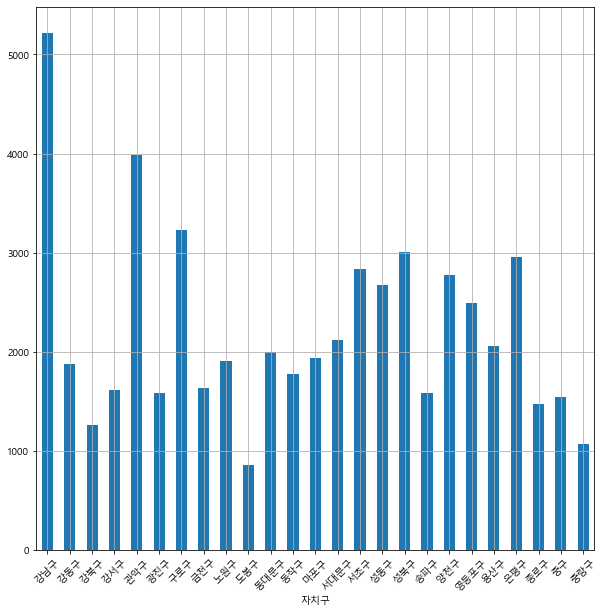

In [65]:
# 소계의 자치구별 바차트 시각화
plt.figure()
data_result['소계'].plot( kind = 'bar',grid = True, figsize = (10,10), rot=45 )
plt.show()

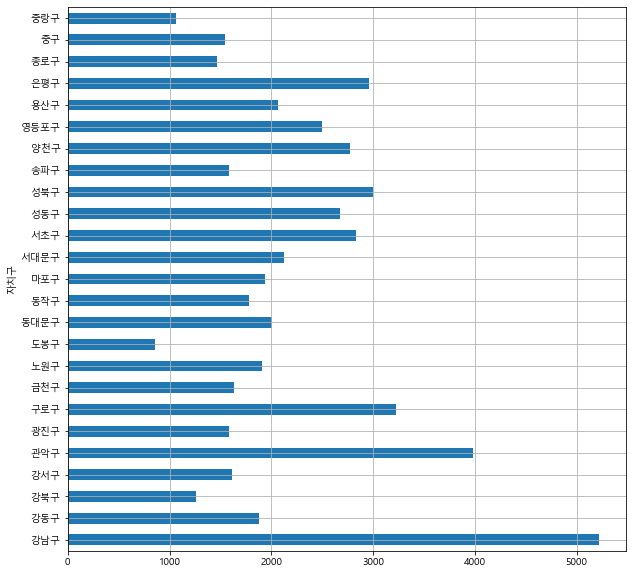

In [66]:
# 수평바 (kind='barh')
plt.figure()
data_result['소계'].plot( kind='barh', grid=True, figsize=(10,10))
plt.show()

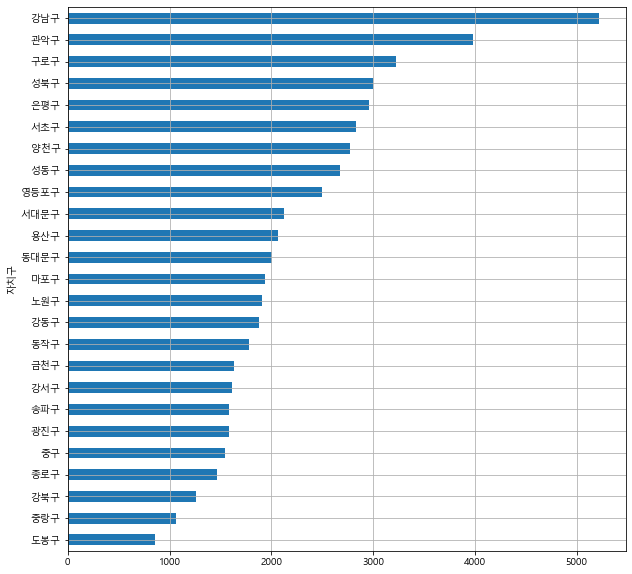

In [67]:
# 강남, 관악, 구로구가 상위권을 차지하고 강남구는 그중애서 압도적으로 설치 대수가 많다.
# 도봉구가 최소량의 설치 수를 가지고 있다. 
plt.figure()
data_result['소계'].sort_values().plot( kind='barh', grid=True, figsize=(10,10))
plt.show()

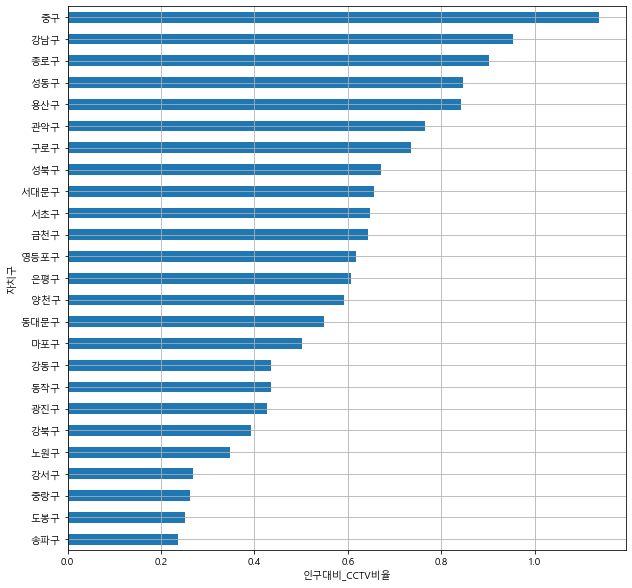

In [68]:
# 인구대비 cctv 비율을 계산하여 정렬 ! 
# 컬럼명 => CCTV비율 계산 -> 정렬 => 시각화 (바차트 수평처리)
data_result['CCTV비율']=data_result['소계']/ data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot( kind='barh', grid=True, figsize=(10,10))
plt.xlabel('인구대비_CCTV비율')
plt.show()

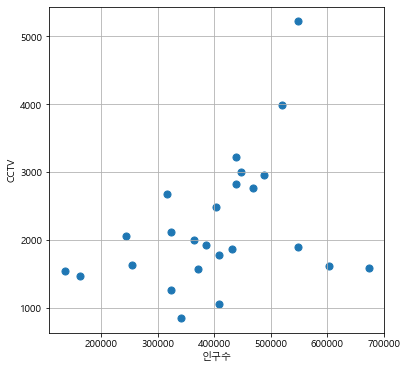

In [69]:
# 산포도 , 평균선 작성 
# 인구대비, CCTV 설치 비율이 가장 적정한 자치구는 ? 
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s = 50 )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [70]:
# 위의 산포도 기준으로 데이터릐 분포를 설명할수있는 기울기가 1인 직선값을 찾는법 
#polyfit()
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
# y = ax + b
# a : 기울기
# b : 절편
fp1
# >>> array([ 기울기, 절편 ])

array([2.85240371e-03, 1.07309855e+03])

In [71]:
# 함수를 구성 
f1 = np.poly1d (fp1) 
# 기울기 , 절편을 넣어서 함수를 생성
type(f1)

numpy.poly1d

In [72]:
# x축 데이터 
# 100000(십만)~700000(칠십만)을  100개의 구간으로 나눈다.
fx = np.linspace( 100000, 700000, 100 )
len(fx)

100

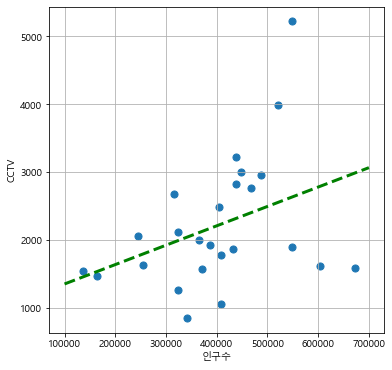

In [73]:
# 산포도 
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s = 50 )
# 인구수 대비 cctv의 수 (직선)
plt.plot( fx, f1(fx), ls ='dashed', color='g', lw=3 )
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [74]:
# 직선은 대표 값이다. 
# 인구수 40만일때 적정 cctv 설치 대수는 2214이다. 
tmp = [400000]
f1(tmp)

array([2214.06003236])

In [75]:
# 산포도 포인트에 자치구를 표현 (텍스트 )
# 대표 값 기준으로 포인트들의 거리를 계산해서 멀수록 색상을 진하게 혹은 연하게 철 
# 색상으로도 설명할수 있도록 데코레이션 처리 

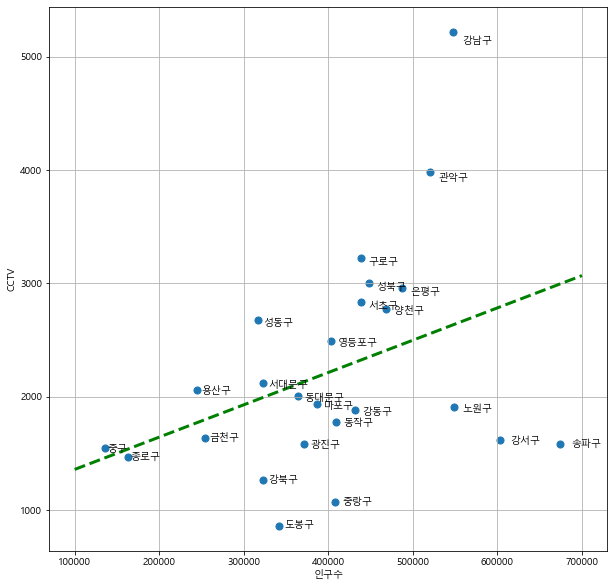

In [76]:
# 산포도 
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50 )
plt.plot( fx, f1(fx), ls='dashed', color = 'g', lw = 3 )
# 포인트에 자치구 명명 
# 대상선정 , 좌표 
# 현재는 전체를 드로잉 했으나, 향후 목적에 따라 특정 자치구만 노출 시킬수 있다.
for n in range( data_result.shape[0] ):
    plt.text(data_result['인구수'][n]*1.02,  # x
             data_result['소계'][n]*0.98,   # y   
             data_result.index[n],fontsize=10 # 텍스트, 폰트 사이즈 10  
            )
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [77]:
data_result.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='자치구')

In [78]:
# 거리계산 , 오차 
# 식 = 절대값| cctv수 - 해당인구수의 평균cctv수 |
data_result['오차']=np.abs(  data_result['소계'] - f1(  data_result['인구수'] ) )
data_result['오차']

자치구
강남구     2586.344483
강동구      426.108759
강북구      729.182492
강서구     1177.840805
관악구     1428.537426
광진구      550.520026
구로구      903.162358
금천구      163.668991
노원구      730.672166
도봉구     1189.619423
동대문구     109.337611
동작구      460.829841
마포구      240.150393
서대문구     126.346861
서초구      512.083685
성동구      703.221217
성북구      652.917392
송파구     1408.212414
양천구      366.562917
영등포구     270.671314
용산구      290.805827
은평구      497.881144
종로구       67.114515
중구        84.021380
중랑구     1169.298565
Name: 오차, dtype: float64

In [79]:
df_sort = data_result.sort_values(by='오차', ascending = False )
df_sort.head()

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,기간,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,2018,547453,542364,5089,67085,0.929578,12.254020,0.953689,2586.344483
관악구,3985,1392.0,609,619,694,671,186.278736,2018,520040,501957,18083,72249,3.477233,13.892970,0.766287,1428.537426
송파구,1586,808.0,166,100,116,396,96.287129,2018,673507,666635,6872,81364,1.020331,12.080647,0.235484,1408.212414
도봉구,858,456.0,59,155,117,71,88.157895,2018,341649,339413,2236,55964,0.654473,16.380554,0.251135,1189.619423
강서구,1617,722.0,187,190,264,254,123.961219,2018,603611,596949,6662,79660,1.103691,13.197241,0.267888,1177.840805


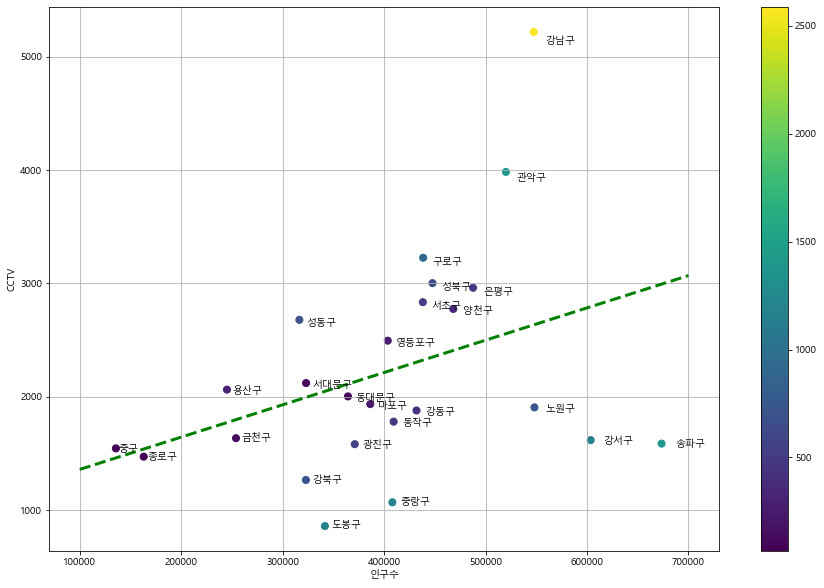

In [80]:
# 산포도
plt.figure(figsize=(15,10))#(x>,y^)
# 기존 식에 오차 추가 
plt.scatter(data_result['인구수'], data_result['소계'], s=50 , c = data_result['오차'])
plt.plot( fx, f1(fx), ls='dashed', color = 'g', lw = 3 )
#오차기준 가장 큰값을 가진 자치구 3개와 작은 값을 가진 자치구 3개를 표현하시오 
# 글자만 3개 3개 드로잉
for n in range( data_result.shape[0] ):
    plt.text(data_result['인구수'][n]*1.02,  # x
             data_result['소계'][n]*0.98,   # y   
             data_result.index[n],fontsize=10 # 텍스트, 폰트 사이즈 10  
            )
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar() #컬러바 표현 
plt.grid()
plt.show()

In [81]:
# 오차 top3
list(data_result.sort_values( by='오차', ascending=False ).index[:3])

['강남구', '관악구', '송파구']

In [82]:
list(data_result.sort_values( by='오차', ascending=False ).index[-3:])

['동대문구', '중구', '종로구']

In [83]:
tmp    = data_result.sort_values( by='오차', ascending=False )
target = list(tmp.index[:3]) + list(tmp.index[-3:])
target
#

['강남구', '관악구', '송파구', '동대문구', '중구', '종로구']

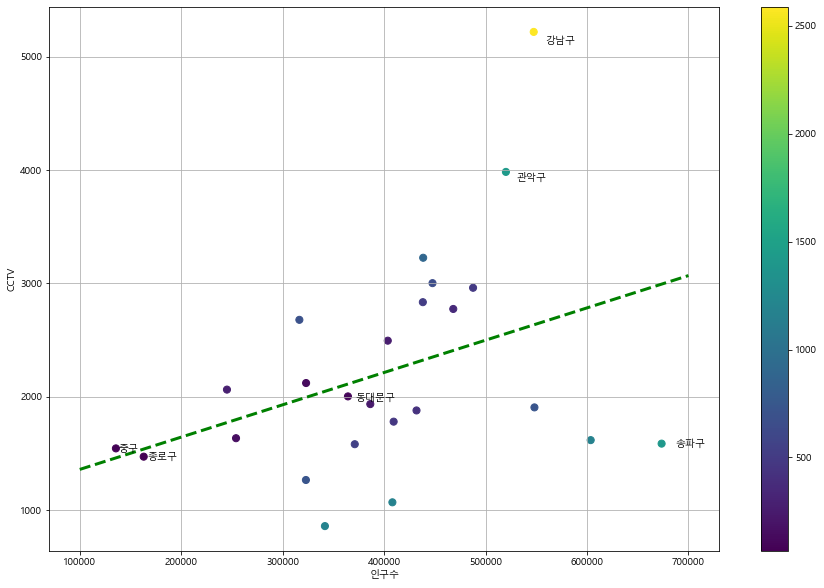

In [84]:
# 산포도
plt.figure(figsize=(15,10)) #(x>,y^)
plt.scatter(data_result['인구수'], data_result['소계'], s=50 , c = data_result['오차'])
plt.plot( fx, f1(fx), ls='dashed', color = 'g', lw = 3 )

for n in range( data_result.shape[0] ):
    if data_result.index[n] in target:
        plt.text(data_result['인구수'][n]*1.02,  # x
                data_result['소계'][n]*0.98,   # y   
                data_result.index[n],
                fontsize=10 # 텍스트, 폰트 사이즈 10  
                )
    
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar() #컬러바 표현 
plt.grid()
plt.show()

# 강남구, 관악구, 송파구는 인구대비 CCTV 현황이 현저히 크거나(2개), 작다(1개)
# 이들은 예산 삭감및 증액등의 기존 지원 예산검토후 액션을 취해야 한다
#, 중구, 종로구, 동대문구는 아주 효육적으로 CCTV를 증설해 왔다 => 포상개념 XX 지원하다

In [85]:
# 자료 덤프
data_result.to_csv( '../data/populate_per_cctv_analysis_result.csv', sep=',', 
                   encoding='utf-8' )

In [86]:
# 자료 덤프가 무엇인가요 ?